In [7]:
import matplotlib.pyplot as plt
import gdal, gdalconst
import numpy as np
from skimage.feature import greycomatrix, greycoprops

# Import the "gdal" and "gdal_array" submodules from within the "osgeo" module
from osgeo import gdal
from osgeo import gdal_array

In [8]:
#Read SAR image into Numpy Array
#filename = "/Users/droy/Desktop/Digital Globe/056239125030_01/056239125030_01_P006_PAN/15MAY03051958-P2AS_R3C4-056239125030_01_P006.TIF'"
#sarfile = gdal.Open(filename, gdal.GA_ReadOnly)
sarfile = gdal.Open('/Users/droy/Desktop/Digital Globe/056239125010_01/056239125010_01_P001_PAN/08NOV02054348-P2AS_R1C2-056239125010_01_P001.TIF', gdal.GA_ReadOnly)
print(sarfile.RasterYSize, sarfile.RasterXSize, sarfile.RasterCount)
#band = sarfile.GetRasterBand(7)
sarraster = sarfile.ReadAsArray()

(16384, 13148, 1)


In [9]:
#Create rasters to receive texture and define filenames
contrastraster = np.copy(sarraster)
contrastraster[:] = 0

dissimilarityraster = np.copy(sarraster)
dissimilarityraster[:] = 0

homogeneityraster = np.copy(sarraster)
homogeneityraster[:] = 0

energyraster = np.copy(sarraster)
energyraster[:] = 0

correlationraster = np.copy(sarraster)
correlationraster[:] = 0

ASMraster = np.copy(sarraster)
ASMraster[:] = 0


In [10]:
#Compute 2 GLCMs: One for a 1-pixel offset to the right, and one for a 1-pixel offset upwards.

image = np.array([[0, 0, 1, 1],
                   [0, 0, 1, 1],
                   [0, 2, 2, 2],
                   [2, 2, 3, 3]], dtype=np.uint8)
#result = greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4],
#                       levels=4)
result = greycomatrix(image, [1], [0],  symmetric = True, normed = True, levels=4 )
print result[:, :, 0, 0]

#print result[:, :, 0, 1]

#print result[:, :, 0, 2]

#print result[:, :, 0, 3]

[[ 0.16666667  0.08333333  0.04166667  0.        ]
 [ 0.08333333  0.16666667  0.          0.        ]
 [ 0.04166667  0.          0.25        0.04166667]
 [ 0.          0.          0.04166667  0.08333333]]


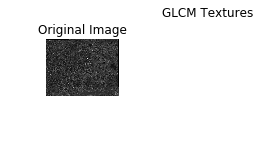

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in divide


In [ ]:
# Create figure to receive results
fig = plt.figure()
fig.suptitle('GLCM Textures')

# In first subplot add original SAR image
ax = plt.subplot(241)
plt.axis('off')
ax.set_title('Original Image')
plt.imshow(sarraster, cmap = 'gray')
plt.show()
#print sarraster.shape[0], sarraster.shape[1]
#print sarraster[0: +4, 0 : +4]
for i in range(sarraster.shape[0] ):
    #print i,
    for j in range(sarraster.shape[1] ):
        #print j,
        # windows needs to fit completely in image
        if i > (contrastraster.shape[0] - 4) or j > (contrastraster.shape[0] - 4):
            continue
        
        # Define size of moving window
        if i >= 3 and j >= 3:
            glcm_window = sarraster[i-3: i+4, j-3 : j+4]
        elif i >= 3 and j < 3:
            glcm_window = sarraster[i-3: i+4, 0 : j+4]
        elif i < 3 and j >= 3:
            glcm_window = sarraster[0: i+4, j-3 : j+4]
        elif i < 3 and j < 3:
            glcm_window = sarraster[0: i+4, 0 : j+4]
            
        glcm_window = glcm_window/(glcm_window.max() - glcm_window.min())
        #print glcm_window.max()
        # Calculate GLCM and textures
        glcm = greycomatrix(glcm_window, [1], [0],  symmetric = True, normed = True )

        # Calculate texture and write into raster where moving window is centered
        contrastraster[i,j]      = greycoprops(glcm, 'contrast')
        dissimilarityraster[i,j] = greycoprops(glcm, 'dissimilarity')
        homogeneityraster[i,j]   = greycoprops(glcm, 'homogeneity')
        energyraster[i,j]        = greycoprops(glcm, 'energy')
        correlationraster[i,j]   = greycoprops(glcm, 'correlation')
        ASMraster[i,j]           = greycoprops(glcm, 'ASM')
        glcm = None
        glcm_window = None
        
        


texturelist = {1: 'contrast', 2: 'dissimilarity', 3: ' homogeneity', 4: 'energy', 5: 'correlation', 6: 'ASM'}
for key in texturelist:
    ax = plt.subplot(2,3,key)
    plt.axis('off')
    ax.set_title(texturelist[key])
    plt.imshow(eval(texturelist[key] + "raster"), cmap = 'gray')

plt.show()